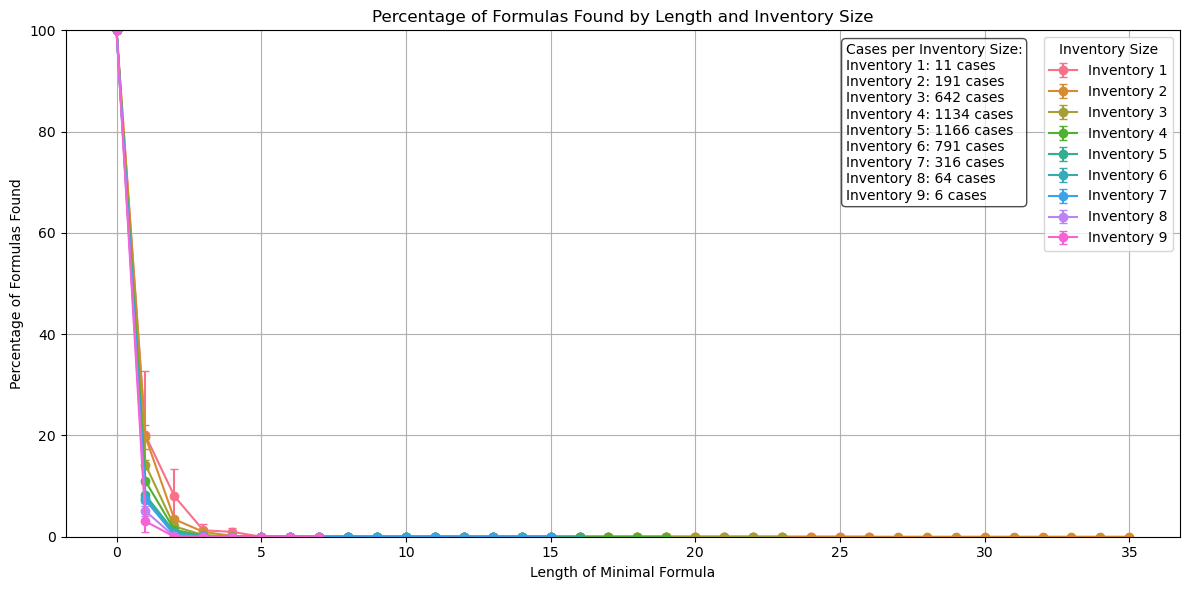

<Figure size 640x480 with 0 Axes>

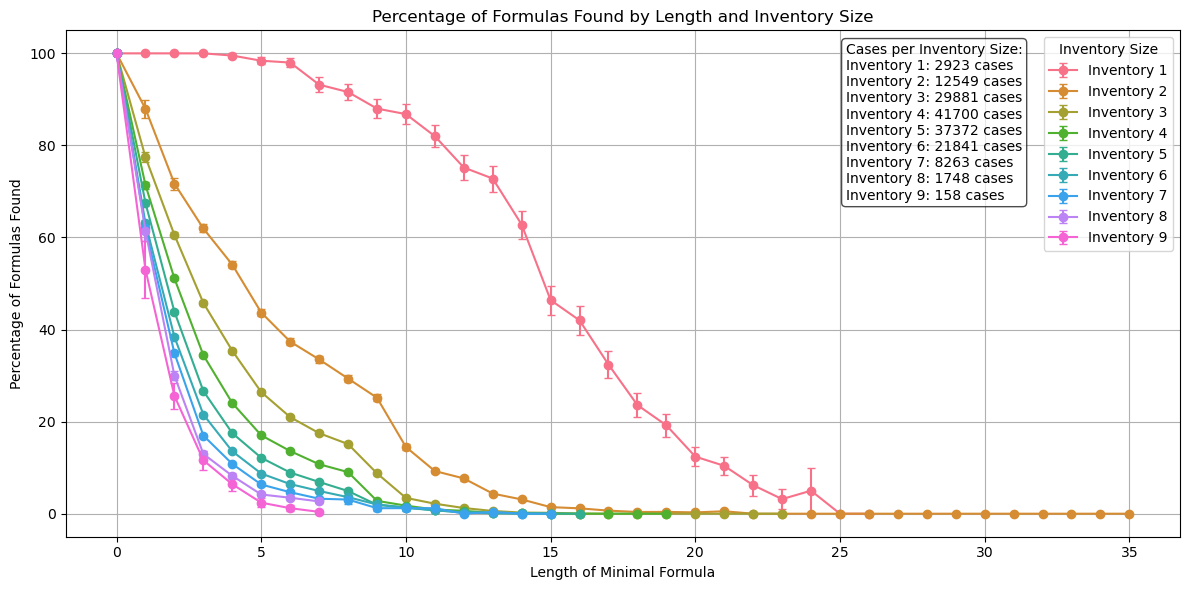

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

df = pd.read_csv('random_results.csv')

operator_columns = ['O', 'A', 'N', 'C', 'B', 'X', 'NA', 'NOR', 'NC']

df['inventory_size'] = df[operator_columns].sum(axis=1)

df['formula_found'] = df['script_found_formula'].notna()

grouped = df.groupby(['inventory_size', 'length']).agg(
    total=('formula_found', 'count'),
    found=('formula_found', 'sum')
).reset_index()

grouped['percentage_found'] = 100 * grouped['found'] / grouped['total']
grouped['stderr'] = 100 * np.sqrt(
    (grouped['percentage_found'] / 100) * (1 - grouped['percentage_found'] / 100) / grouped['total']
)

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(grouped['inventory_size'].unique()))

for i, (inv_size, group) in enumerate(grouped.groupby('inventory_size')):
    plt.errorbar(
        group['length'],
        group['percentage_found'],
        yerr=group['stderr'],
        label=f'Inventory {inv_size}',
        fmt='-o',
        capsize=3,
        color=palette[i]
    )

plt.title('Percentage of Formulas Found by Length and Inventory Size')
plt.xlabel('Length of Minimal Formula')
plt.ylabel('Percentage of Formulas Found')
plt.grid(True)

plt.ylim(0, 100) 

plt.legend(title='Inventory Size', loc='upper right', frameon=True)

counts = df[df['formula_found']].groupby('inventory_size').size()
counts_str = "\n".join([f"Inventory {k}: {v} cases" for k, v in counts.items()])

plt.text(
    0.7, 0.66, f"Cases per Inventory Size:\n{counts_str}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)

plt.tight_layout()
plt.show()


counts = df[df['formula_found']].groupby('inventory_size').size()

counts_str = "\n".join([f"Inventory {k}: {v} cases" for k, v in counts.items()])

plt.figtext(3.7, 10.1, f"Cases per Inventory Size:\n{counts_str}", ha='center', fontsize=10)

plt.show()

df = pd.read_csv('merged_results.csv')

operator_columns = ['O', 'A', 'N', 'C', 'B', 'X', 'NA', 'NOR', 'NC']


df['inventory_size'] = df[operator_columns].sum(axis=1)

df['formula_found'] = df['script_found_formula'].notna()

grouped = df.groupby(['inventory_size', 'length']).agg(
    total=('formula_found', 'count'),
    found=('formula_found', 'sum')
).reset_index()

grouped['percentage_found'] = 100 * grouped['found'] / grouped['total']
grouped['stderr'] = 100 * np.sqrt(
    (grouped['percentage_found'] / 100) * (1 - grouped['percentage_found'] / 100) / grouped['total']
)

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(grouped['inventory_size'].unique()))

for i, (inv_size, group) in enumerate(grouped.groupby('inventory_size')):
    plt.errorbar(
        group['length'],
        group['percentage_found'],
        yerr=group['stderr'],
        label=f'Inventory {inv_size}',
        fmt='-o',
        capsize=3,
        color=palette[i]
    )

plt.title('Percentage of Formulas Found by Length and Inventory Size')
plt.xlabel('Length of Minimal Formula')
plt.ylabel('Percentage of Formulas Found')
plt.grid(True)

plt.legend(title='Inventory Size', loc='upper right', frameon=True)

counts = df[df['formula_found']].groupby('inventory_size').size()
counts_str = "\n".join([f"Inventory {k}: {v} cases" for k, v in counts.items()])

plt.text(
    0.7, 0.66, f"Cases per Inventory Size:\n{counts_str}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)

plt.tight_layout()
plt.show()


counts = df[df['formula_found']].groupby('inventory_size').size()

counts_str = "\n".join([f"Inventory {k}: {v} cases" for k, v in counts.items()])

plt.figtext(3.7, 10.1, f"Cases per Inventory Size:\n{counts_str}", ha='center', fontsize=10)

plt.show()






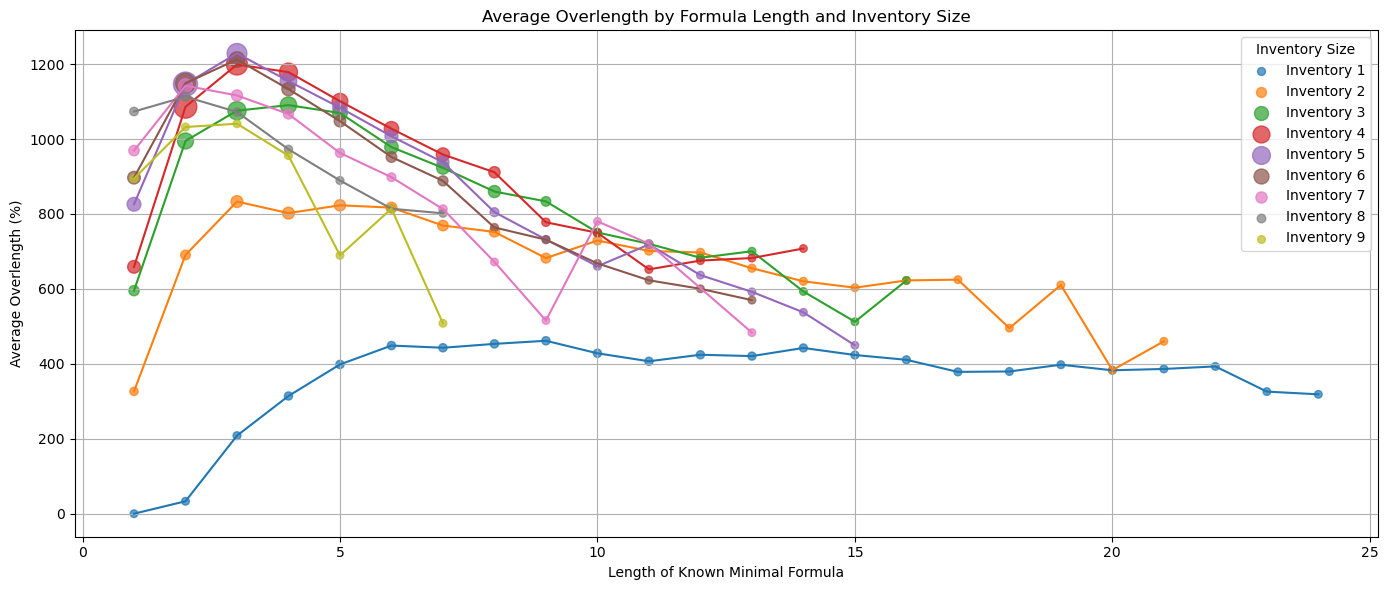

In [2]:
df['inventory_size'] = df[operator_columns].sum(axis=1)

df = df[(df['length'] > 0) & df['script_overlength_percent'].notna()]

grouped = df.groupby(['length', 'inventory_size']).agg(
    avg_overlength=('script_overlength_percent', 'mean'),
    count=('script_overlength_percent', 'count')
).reset_index()


min_size, max_size = 30, 300  
grouped['marker_size'] = min_size + (grouped['count'] - grouped['count'].min()) / (grouped['count'].max() - grouped['count'].min()) * (max_size - min_size)


plt.figure(figsize=(14, 6))
palette = sns.color_palette('tab10', n_colors=grouped['inventory_size'].nunique())

for i, (inv_size, data) in enumerate(grouped.groupby('inventory_size')):
    plt.scatter(
        data['length'],
        data['avg_overlength'],
        s=data['marker_size'],
        label=f'Inventory {inv_size}',
        color=palette[i],
        alpha=0.7
    )
    plt.plot(
        data['length'],
        data['avg_overlength'],
        color=palette[i],
        linewidth=1.5
    )

plt.title('Average Overlength by Formula Length and Inventory Size')
plt.xlabel('Length of Known Minimal Formula')
plt.ylabel('Average Overlength (%)')
plt.legend(title='Inventory Size', loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()


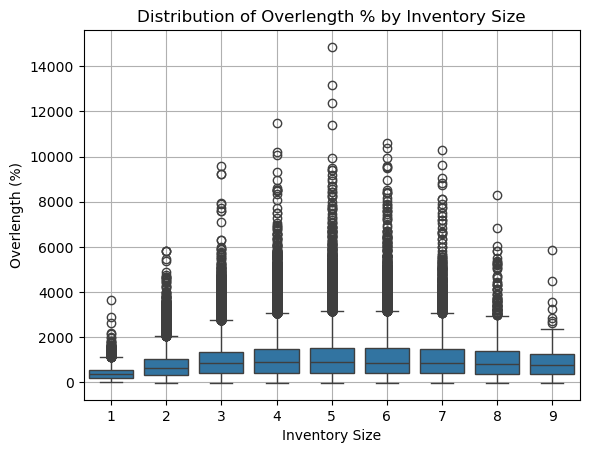

In [3]:
sns.boxplot(data=df[df['formula_found']], x='inventory_size', y='script_overlength_percent')
plt.title("Distribution of Overlength % by Inventory Size")
plt.xlabel("Inventory Size")
plt.ylabel("Overlength (%)")
plt.grid(True)
plt.show()


/tmp/ipykernel_6249/633396906.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=op_ov_df, x='Operator', y='AvgOverlength', palette='mako')


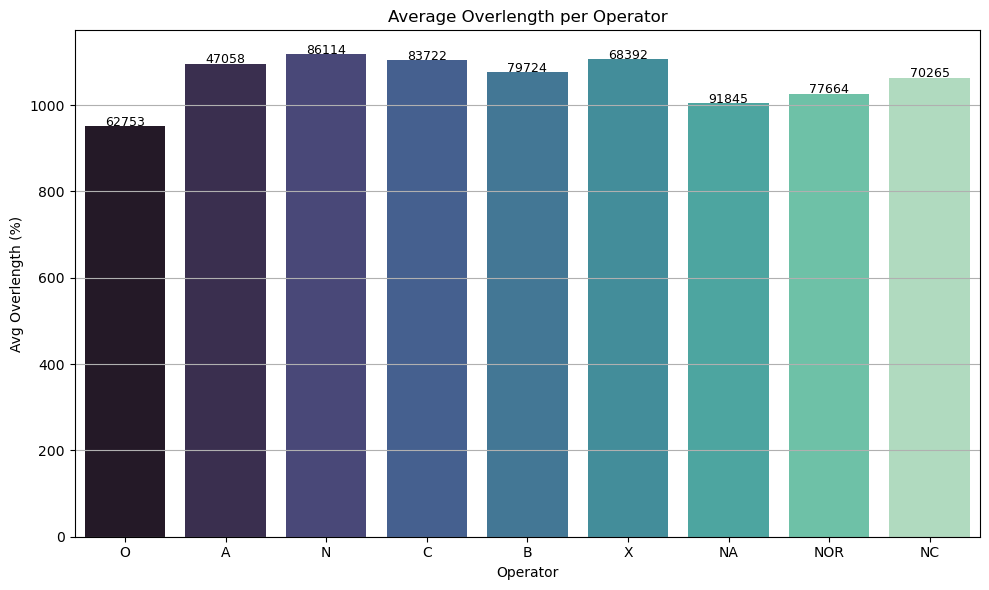

In [4]:
operator_overlength = []

for op in operator_columns:
    subset = df[(df[op] == 1) & (df['formula_found'])]
    if not subset.empty:
        avg_ov = subset['script_overlength_percent'].mean()
        operator_overlength.append((op, avg_ov, len(subset)))

op_ov_df = pd.DataFrame(operator_overlength, columns=['Operator', 'AvgOverlength', 'Cases'])

plt.figure(figsize=(10, 6))
sns.barplot(data=op_ov_df, x='Operator', y='AvgOverlength', palette='mako')

for i, row in op_ov_df.iterrows():
    plt.text(i, row.AvgOverlength + 1, f"{int(row.Cases)}", ha='center', fontsize=9)

plt.title("Average Overlength per Operator")
plt.ylabel("Avg Overlength (%)")
plt.xlabel("Operator")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


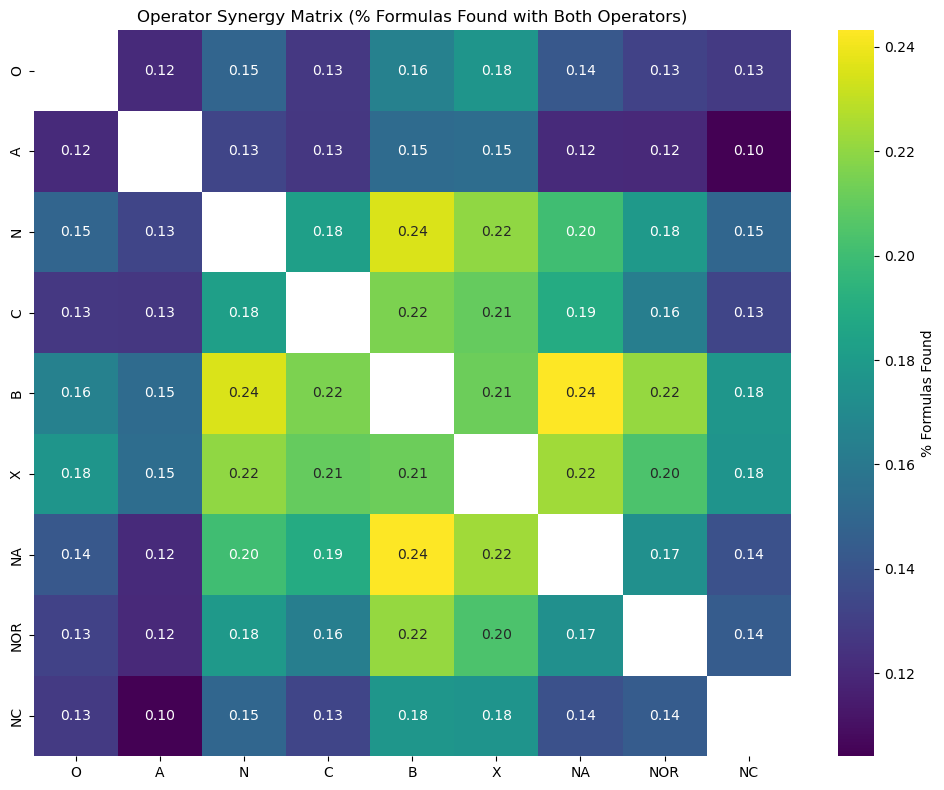

In [5]:
df = pd.read_csv('merged_results.csv')

df['inventory_size'] = df[operator_columns].sum(axis=1)
df['formula_found'] = df['script_found_formula'].notna()


op_synergy = pd.DataFrame(index=operator_columns, columns=operator_columns, dtype=float)

for op1, op2 in combinations(operator_columns, 2):
    subset = df[(df[op1] == 1) & (df[op2] == 1)]
    if len(subset) > 0:
        success_rate = subset['formula_found'].mean()
        op_synergy.loc[op1, op2] = success_rate
        op_synergy.loc[op2, op1] = success_rate

 
np.fill_diagonal(op_synergy.values, np.nan)


plt.figure(figsize=(10, 8))
sns.heatmap(op_synergy, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': '% Formulas Found'})
plt.title("Operator Synergy Matrix (% Formulas Found with Both Operators)")
plt.tight_layout()
plt.show()



/tmp/ipykernel_6249/1627569286.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


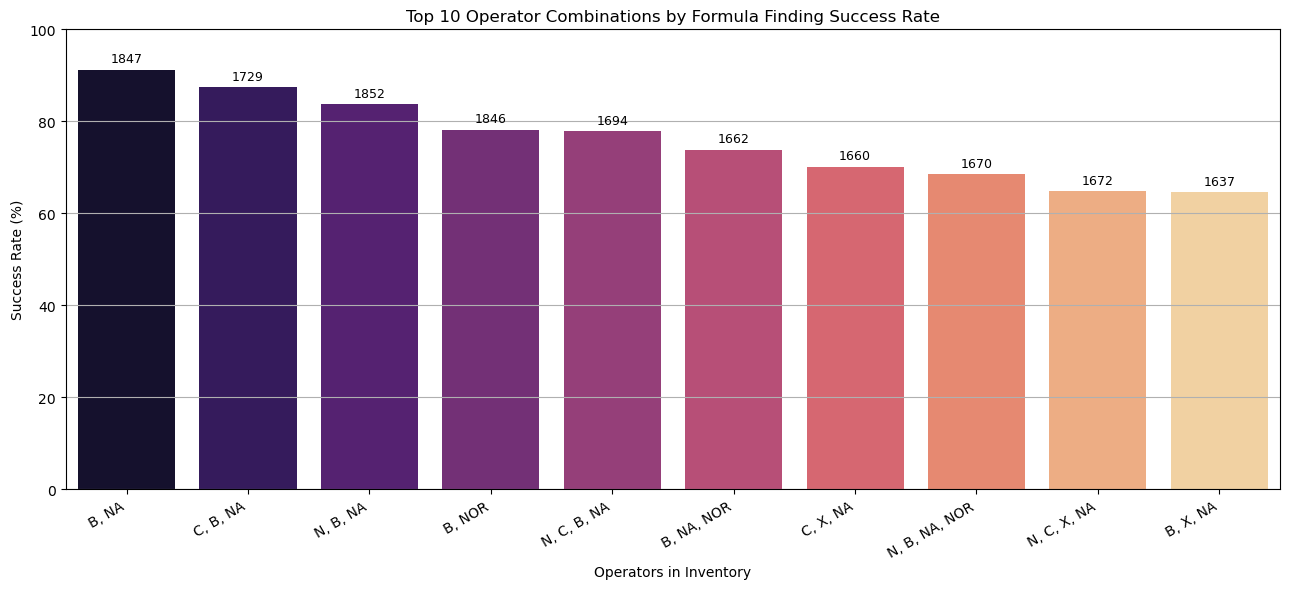

In [6]:
df = pd.read_csv("merged_results.csv")


operator_columns = ['O', 'A', 'N', 'C', 'B', 'X', 'NA', 'NOR', 'NC']


df['inventory_key'] = df[operator_columns].apply(
    lambda row: tuple(op for op, val in zip(operator_columns, row) if val == 1),
    axis=1
)

df['formula_found'] = df['script_found_formula'].notna()


inventory_perf = df.groupby('inventory_key')['formula_found'].agg(['count', 'sum']).reset_index()
inventory_perf = inventory_perf[inventory_perf['count'] > 10]
inventory_perf['success_rate'] = 100 * inventory_perf['sum'] / inventory_perf['count']
inventory_perf['inventory_label'] = inventory_perf['inventory_key'].apply(lambda x: ', '.join(x))


top_inventory = inventory_perf.sort_values('success_rate', ascending=False).head(10).reset_index(drop=True)


plt.figure(figsize=(13, 6))
ax = sns.barplot(
    data=top_inventory,
    x='inventory_label',
    y='success_rate',
    palette='magma'
)


for bar, count in zip(ax.patches, top_inventory['count']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 1, str(count), ha='center', va='bottom', fontsize=9)

plt.ylim(0, 100) 
plt.xticks(rotation=30, ha='right')
plt.ylabel("Success Rate (%)")
plt.xlabel("Operators in Inventory")
plt.title("Top 10 Operator Combinations by Formula Finding Success Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipykernel_6249/942114081.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


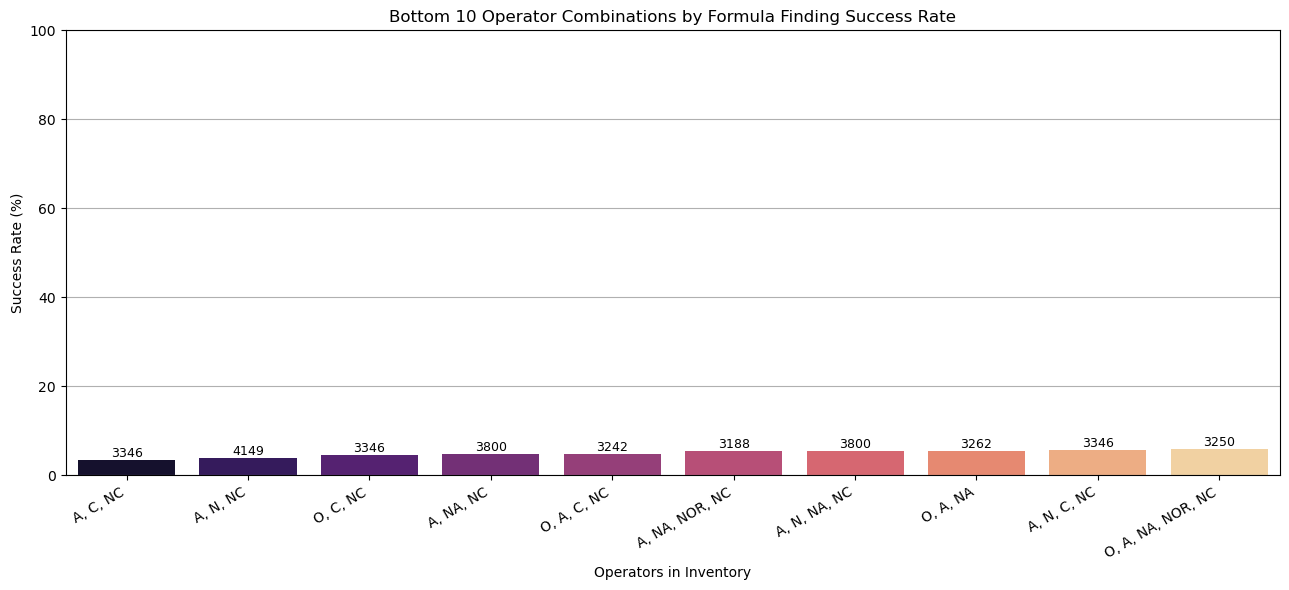

In [7]:
df = pd.read_csv("merged_results.csv")

df['inventory_key'] = df[operator_columns].apply(
    lambda row: tuple(op for op, val in zip(operator_columns, row) if val == 1),
    axis=1
)

df['formula_found'] = df['script_found_formula'].notna()

inventory_perf = df.groupby('inventory_key')['formula_found'].agg(['count', 'sum']).reset_index()
inventory_perf = inventory_perf[inventory_perf['count'] > 10]
inventory_perf['success_rate'] = 100 * inventory_perf['sum'] / inventory_perf['count']
inventory_perf['inventory_label'] = inventory_perf['inventory_key'].apply(lambda x: ', '.join(x))

worst_inventory = inventory_perf.sort_values('success_rate', ascending=True).head(10).reset_index(drop=True)

plt.figure(figsize=(13, 6))
ax = sns.barplot(
    data=worst_inventory,
    x='inventory_label',
    y='success_rate',
    palette='magma'
)

for bar, count in zip(ax.patches, worst_inventory['count']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0, str(count), ha='center', va='bottom', fontsize=9)
plt.ylim(0, 100) 
plt.xticks(rotation=30, ha='right')
plt.ylabel("Success Rate (%)")
plt.xlabel("Operators in Inventory")
plt.title("Bottom 10 Operator Combinations by Formula Finding Success Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


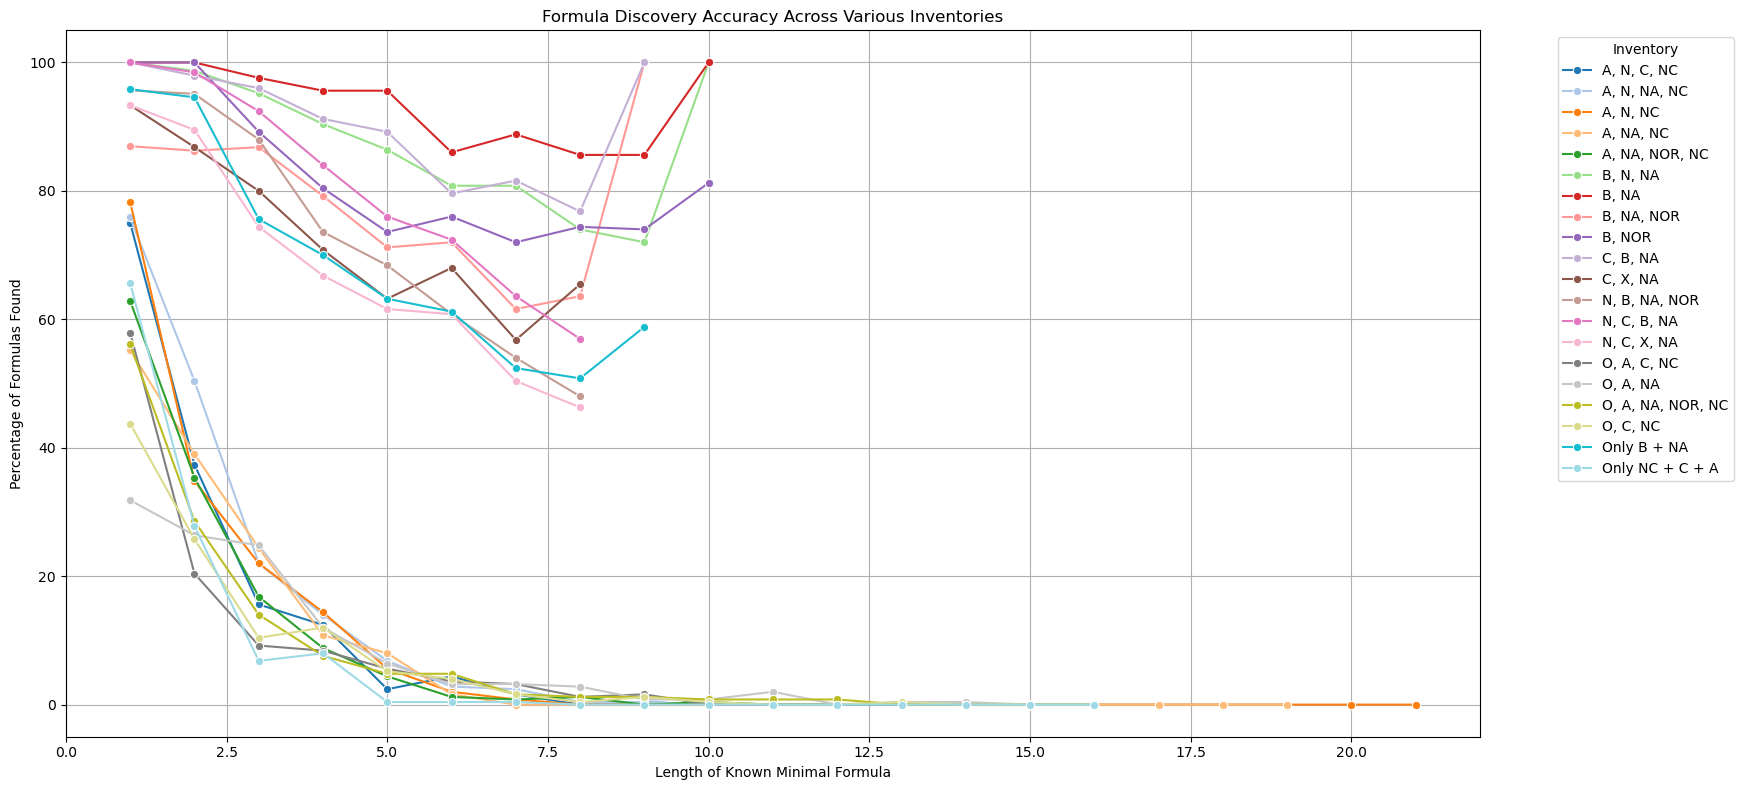

In [8]:
df = pd.read_csv("merged_results.csv")

inventory_specs = [
    (['B', 'NA', 'X'], 'Only B + NA'),
    (['NC', 'C', 'A'], 'Only NC + C + A'),
    (['A', 'N', 'NC'], 'A, N, NC'),
    (['O', 'C', 'NC'], 'O, C, NC'),
    (['A', 'NA', 'NC'], 'A, NA, NC'),
    (['O', 'A', 'C', 'NC'], 'O, A, C, NC'),
    (['A', 'NA', 'NOR', 'NC'], 'A, NA, NOR, NC'),
    (['A', 'N', 'NA', 'NC'], 'A, N, NA, NC'),
    (['O', 'A', 'NA'], 'O, A, NA'),
    (['A', 'N', 'C', 'NC'], 'A, N, C, NC'),
    (['O', 'A', 'NA', 'NOR', 'NC'], 'O, A, NA, NOR, NC'),
    (['B', 'NA'], 'B, NA'),
    (['C', 'B', 'NA'], 'C, B, NA'),
    (['B', 'N', 'NA'], 'B, N, NA'),
    (['B', 'NOR'], 'B, NOR'),
    (['N', 'C', 'B', 'NA'], 'N, C, B, NA'),
    (['B', 'NA', 'NOR'], 'B, NA, NOR'),
    (['C', 'X', 'NA'], 'C, X, NA'),
    (['N', 'B', 'NA', 'NOR'], 'N, B, NA, NOR'),
    (['N', 'C', 'X', 'NA'], 'N, C, X, NA'),
]


dfs = []
for ops, label in inventory_specs:
    mask = df[ops].eq(1).all(axis=1) & (df[[op for op in operator_columns if op not in ops]].sum(axis=1) == 0)
    subset = df[mask].copy()
    subset['config'] = label
    dfs.append(subset)


combined = pd.concat(dfs)


combined = combined[combined['length'] > 0].copy()
combined['formula_found'] = combined['script_found_formula'].notna()


grouped = combined.groupby(['config', 'length']).agg(
    total=('formula_found', 'count'),
    found=('formula_found', 'sum')
).reset_index()


grouped['percentage_found'] = 100 * grouped['found'] / grouped['total']


plt.figure(figsize=(15, 8))
sns.lineplot(
    data=grouped,
    x='length',
    y='percentage_found',
    hue='config',
    marker='o',
    palette='tab20'
)


plt.title('Formula Discovery Accuracy Across Various Inventories')
plt.xlabel('Length of Known Minimal Formula')
plt.ylabel('Percentage of Formulas Found')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Inventory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


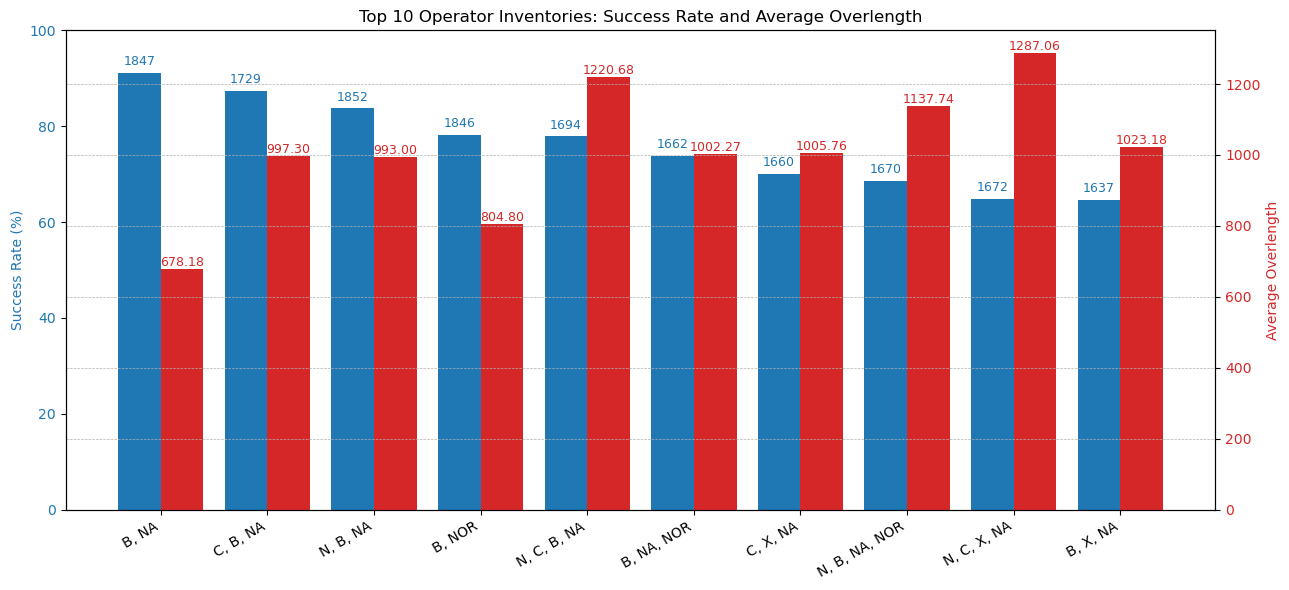

In [9]:
df = pd.read_csv("merged_results.csv")

df['inventory_key'] = df[operator_columns].apply(
    lambda row: tuple(op for op, val in zip(operator_columns, row) if val == 1),
    axis=1
)


df['formula_found'] = df['script_found_formula'].notna()


df['overlength'] = df['script_overlength_percent'] - df['length']
df.loc[~df['formula_found'], 'overlength'] = None


inventory_perf = df.groupby('inventory_key').agg(
    count=('formula_found', 'count'),
    found=('formula_found', 'sum'),
    avg_overlength=('overlength', 'mean')
).reset_index()


inventory_perf = inventory_perf[inventory_perf['count'] > 10]
inventory_perf['success_rate'] = 100 * inventory_perf['found'] / inventory_perf['count']
inventory_perf['inventory_label'] = inventory_perf['inventory_key'].apply(lambda x: ', '.join(x))


top_inventory = inventory_perf.sort_values('success_rate', ascending=False).head(10).reset_index(drop=True)


fig, ax1 = plt.subplots(figsize=(13, 6))


bar_width = 0.4
x = range(len(top_inventory))
bars1 = ax1.bar(
    [i - bar_width/2 for i in x],
    top_inventory['success_rate'],
    width=bar_width,
    label='Success Rate (%)',
    color='tab:blue'
)
ax1.set_ylabel("Success Rate (%)", color='tab:blue')
ax1.set_ylim(0, 100)
ax1.set_xticks(x)
ax1.set_xticklabels(top_inventory['inventory_label'], rotation=30, ha='right')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
bars2 = ax2.bar(
    [i + bar_width/2 for i in x],
    top_inventory['avg_overlength'],
    width=bar_width,
    label='Average Overlength',
    color='tab:red'
)
ax2.set_ylabel("Average Overlength", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax1.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 1,
             f"{top_inventory.loc[i, 'count']}", ha='center', va='bottom', fontsize=9, color='tab:blue')
    ax2.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 0.1,
             f"{top_inventory.loc[i, 'avg_overlength']:.2f}", ha='center', va='bottom', fontsize=9, color='tab:red')


plt.title("Top 10 Operator Inventories: Success Rate and Average Overlength")
fig.tight_layout()
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.show()


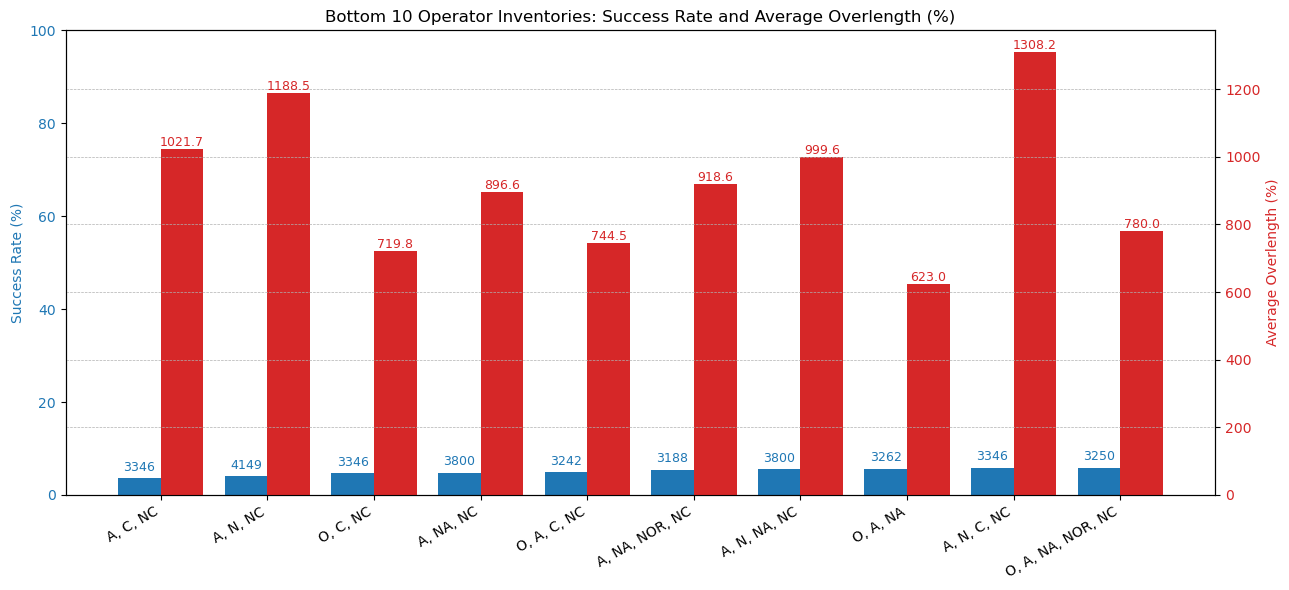

In [10]:
df = pd.read_csv("merged_results.csv")

df['inventory_key'] = df[operator_columns].apply(
    lambda row: tuple(op for op, val in zip(operator_columns, row) if val == 1),
    axis=1
)


df['formula_found'] = df['script_found_formula'].notna()


df.loc[~df['formula_found'], 'script_overlength_percent'] = None


inventory_perf = df.groupby('inventory_key').agg(
    count=('formula_found', 'count'),
    found=('formula_found', 'sum'),
    avg_overlength=('script_overlength_percent', 'mean')
).reset_index()


inventory_perf = inventory_perf[inventory_perf['count'] > 10]
inventory_perf['success_rate'] = 100 * inventory_perf['found'] / inventory_perf['count']
inventory_perf['inventory_label'] = inventory_perf['inventory_key'].apply(lambda x: ', '.join(x))


bottom_inventory = inventory_perf.sort_values('success_rate', ascending=True).head(10).reset_index(drop=True)


fig, ax1 = plt.subplots(figsize=(13, 6))


bar_width = 0.4
x = range(len(bottom_inventory))
bars1 = ax1.bar(
    [i - bar_width/2 for i in x],
    bottom_inventory['success_rate'],
    width=bar_width,
    label='Success Rate (%)',
    color='tab:blue'
)
ax1.set_ylabel("Success Rate (%)", color='tab:blue')
ax1.set_ylim(0, 100)
ax1.set_xticks(x)
ax1.set_xticklabels(bottom_inventory['inventory_label'], rotation=30, ha='right')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
bars2 = ax2.bar(
    [i + bar_width/2 for i in x],
    bottom_inventory['avg_overlength'],
    width=bar_width,
    label='Avg Overlength (%)',
    color='tab:red'
)
ax2.set_ylabel("Average Overlength (%)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax1.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 1,
             f"{bottom_inventory.loc[i, 'count']}", ha='center', va='bottom', fontsize=9, color='tab:blue')
    if pd.notna(bar2.get_height()):
        ax2.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 0.5,
                 f"{bottom_inventory.loc[i, 'avg_overlength']:.1f}", ha='center', va='bottom', fontsize=9, color='tab:red')


plt.title("Bottom 10 Operator Inventories: Success Rate and Average Overlength (%)")
fig.tight_layout()
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.show()
